<a href="https://colab.research.google.com/github/Osmayda/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction of Product Sales**

Author: Osmayda Nino

##**Project Overview**

##**Load and Inspect Data**

Mount Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [ ]:
import pandas as pd

Load the Dataset

In [ ]:
filename = '/content/drive/MyDrive/Coding Dojo/Wk 2: Pandas for Data Manipulation/Datafiles/sales_predictions.csv'
df = pd.read_csv(filename)

Preview Data

Use df.info() method to preview the first rows of data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Use df.head() to preview the first rows of data

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##**Clean Data**

Explore the data - what do you need to do to clean this data? Clean it!

How many rows and columns?

Find the shape of the dataframe

In [ ]:
df.shape

(8523, 12)

What are the datatypes of each variable?

Check the column data types using the dtypes attribute

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Are there duplicates? If so, drop any duplicates

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

Count the duplicates

In [ ]:
df.duplicated().sum()

0

Identify missing values.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight and Outlet_Size have some missing(null) values.

Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

##Impute Missing Values with an average of that column. The item weight and the size of the outlet are import information for retailer to understand how properties of products play crucial roles in increasing sales.



#**Clean Missing Item_Weight**

Because Item_Weight is a nubmerical value, we should be able to use mean, median, or mode to impute values. 

We will use mean.

Since Item Weight is a numerical value we can use mean, median, or mode. We will use median as we have missing numbers.

Impute average for Item_Weight

In [ ]:
median_item_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_item_weight, inplace=True)

Confirm that there are no missing values after addressing them (Item_Weight)

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Clean Missing Outlet_Size

In [ ]:
pd.unique(df['Outlet_Size'])

array(['Medium', nan, 'High', 'Small'], dtype=object)

Outlet-Size has 4 categories: Small, Medium, High, and nan. Mean, medium, or mode would not create a clearer picture for the size of the outlet therefore we will create a category called "missing".

In [ ]:
df['Outlet_Size'].fillna("missing", inplace=True)

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

Check the unique values and counts of the 'Item_Weight'

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Check the unique values and counts of the 'Item_Weight'

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Standardize the values in the Item_Fat_Content column

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

For any numerical columns, obtain the summary statistics of each (min, max, mean).

Show summary stats for all numeric columns

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


##**Exploratory Data Analysis**

Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Histogram

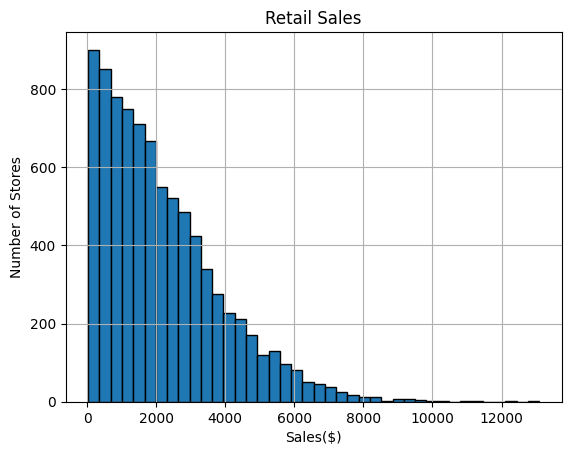

In [ ]:
#define a MatplotLib ax object using pandas' .hist(bin=30)
ax = df['Item_Outlet_Sales'].hist(bins=40, edgecolor='black')

# Set the Title
ax.set_title('Retail Sales')
# Set the X axis label
ax.set_xlabel('Sales($)')
# Set the Y axis label
ax.set_ylabel('Number of Stores');

The number of sales increase as the size of the store increases. The bigger the store the more it sells.

- Use a Boxplot to compare the outlet type to its sales. 

In [ ]:
# Display the descriptive statistics for the column
df['Item_Type'].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [ ]:
df['Outlet_Size'].describe()

count       8523
unique         4
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

#Seaborn Box Plot

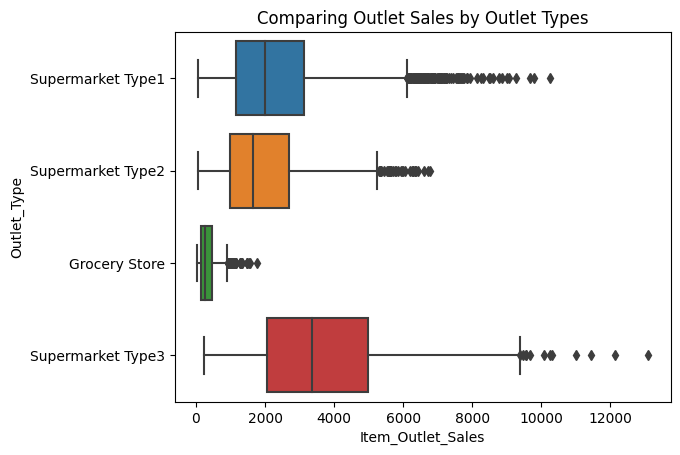

In [ ]:
# Define a MatplotLib ax object using seaborn.boxplot()
ax = sns.boxplot(x='Item_Outlet_Sales', y='Outlet_Type', data=df)

#Set the Title
ax.set_title('Comparing Outlet Sales by Outlet Types');

Each Outlet Type has many outliers. 
- Supermarket Type1 has the most outliers. 
- Supermarket Type 1 has the higher max. 
- Supermarket Type 1 has a bigger IQR.


#Heatmap

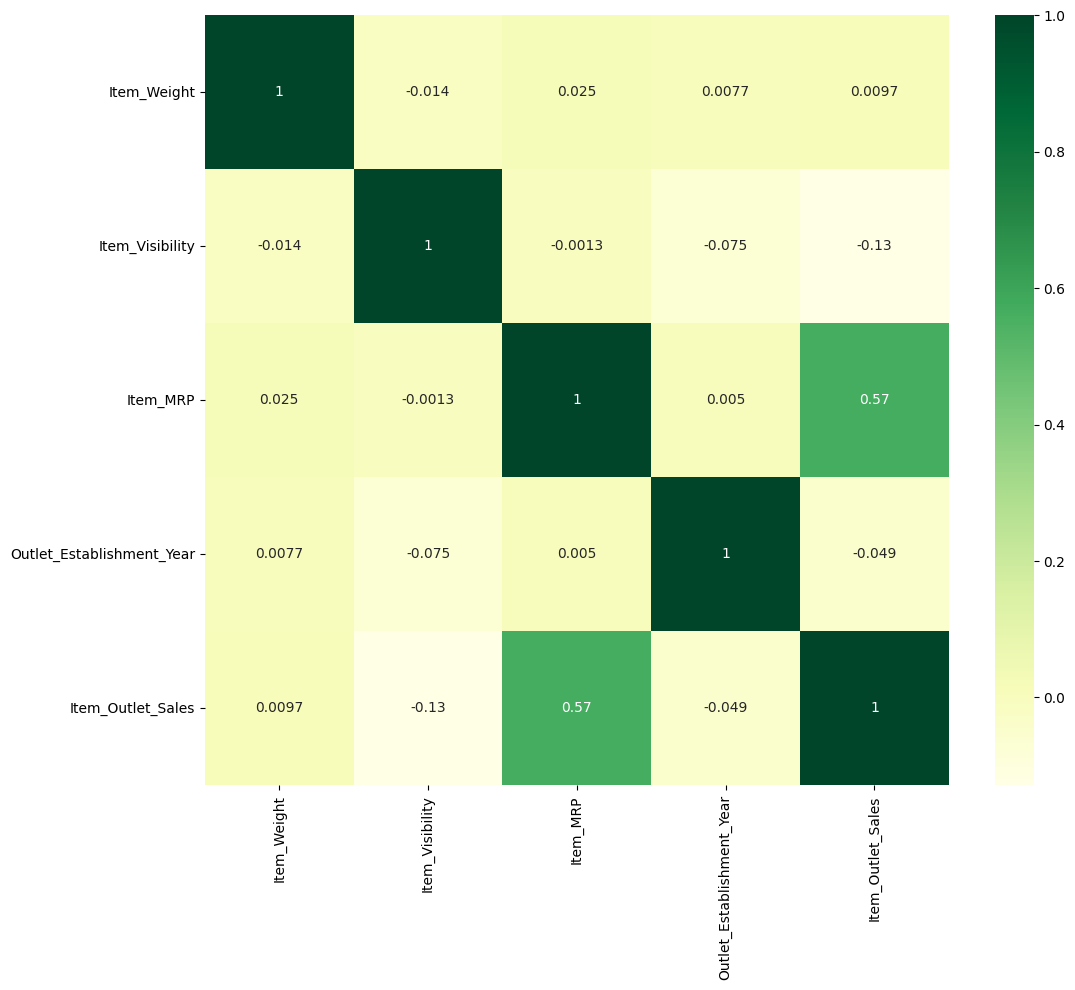

In [ ]:
# Define MatplotLib fig and ax objects using plt.subplots()
fig, ax = plt.subplots(figsize = (12,10))
corr = df.corr()

#Define a MatplotLib ax object using sns.heatmap()
ax = sns.heatmap(corr, cmap= 'YlGn', annot = True);

- There is a moderate positive correlation between Item_MRP and Item_Outlet_Sales. 

##**Explanatory Data Analysis**

##**Possible Questions to Answer:**
1. What are the average product sales for each product category?
2. What were the sales like for Supermarket stores? 

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**1. What are the average product sales for each product category?**

In [ ]:
means = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

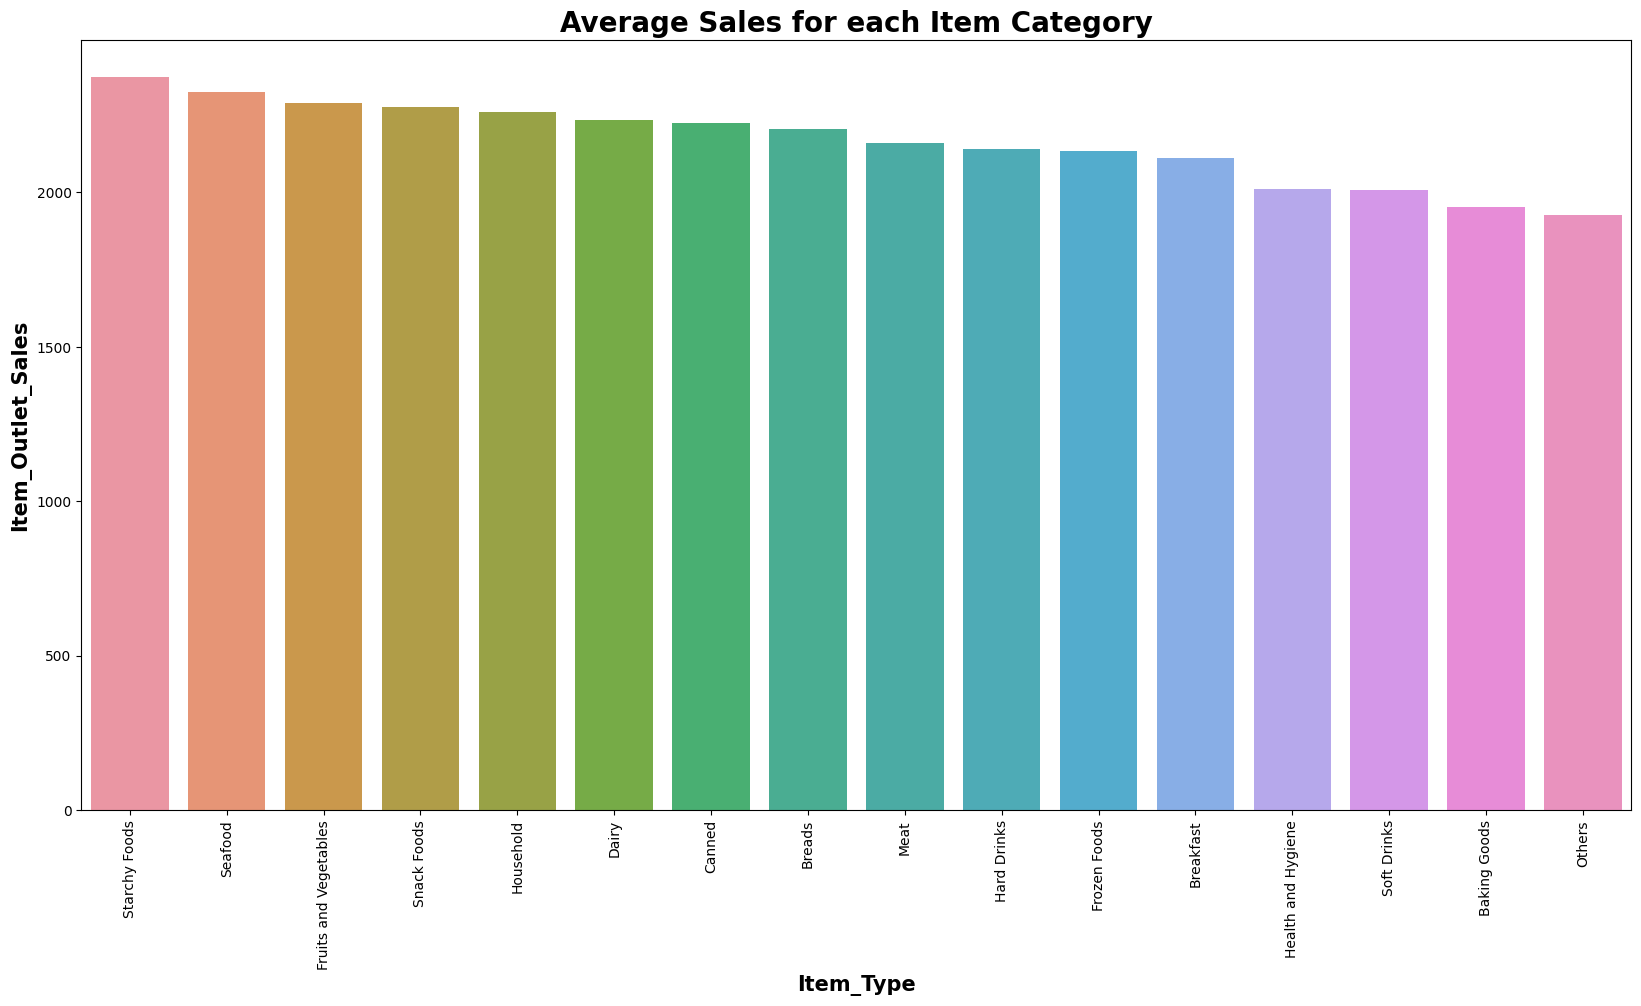

In [ ]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Type', y = 'Item_Outlet_Sales', order = means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Sales for each Item Category', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item_Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15, fontweight = 'bold');

The top five highest average sales are as follows:
- Starchy Foods: $2,374.33

- Seafood: $2,326.07

- Fruits and Vegetables: $2,289.01

- Snack Foods: $2,277.32

- Household: $2,258.78

The bottom five average sales are as follows:
- Breakfast: $2,111.81

- Health and Hygiene: $2,010.00

- Soft Drinks: $2,006.51

- Baking Goods: $1,952.97

- Others: $1,926.14

**2. What were the sales like for Supermarket stores?**

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
outlet_type = df[df['Outlet_Type'] == 'Supermarket Type1']
outlet_type = outlet_type['Item_Type'].value_counts().sort_values(ascending = False).to_frame()
outlet_type.head()

,Item_Type
Fruits and Vegetables,805
Snack Foods,785
Household,597
Frozen Foods,572
Dairy,450


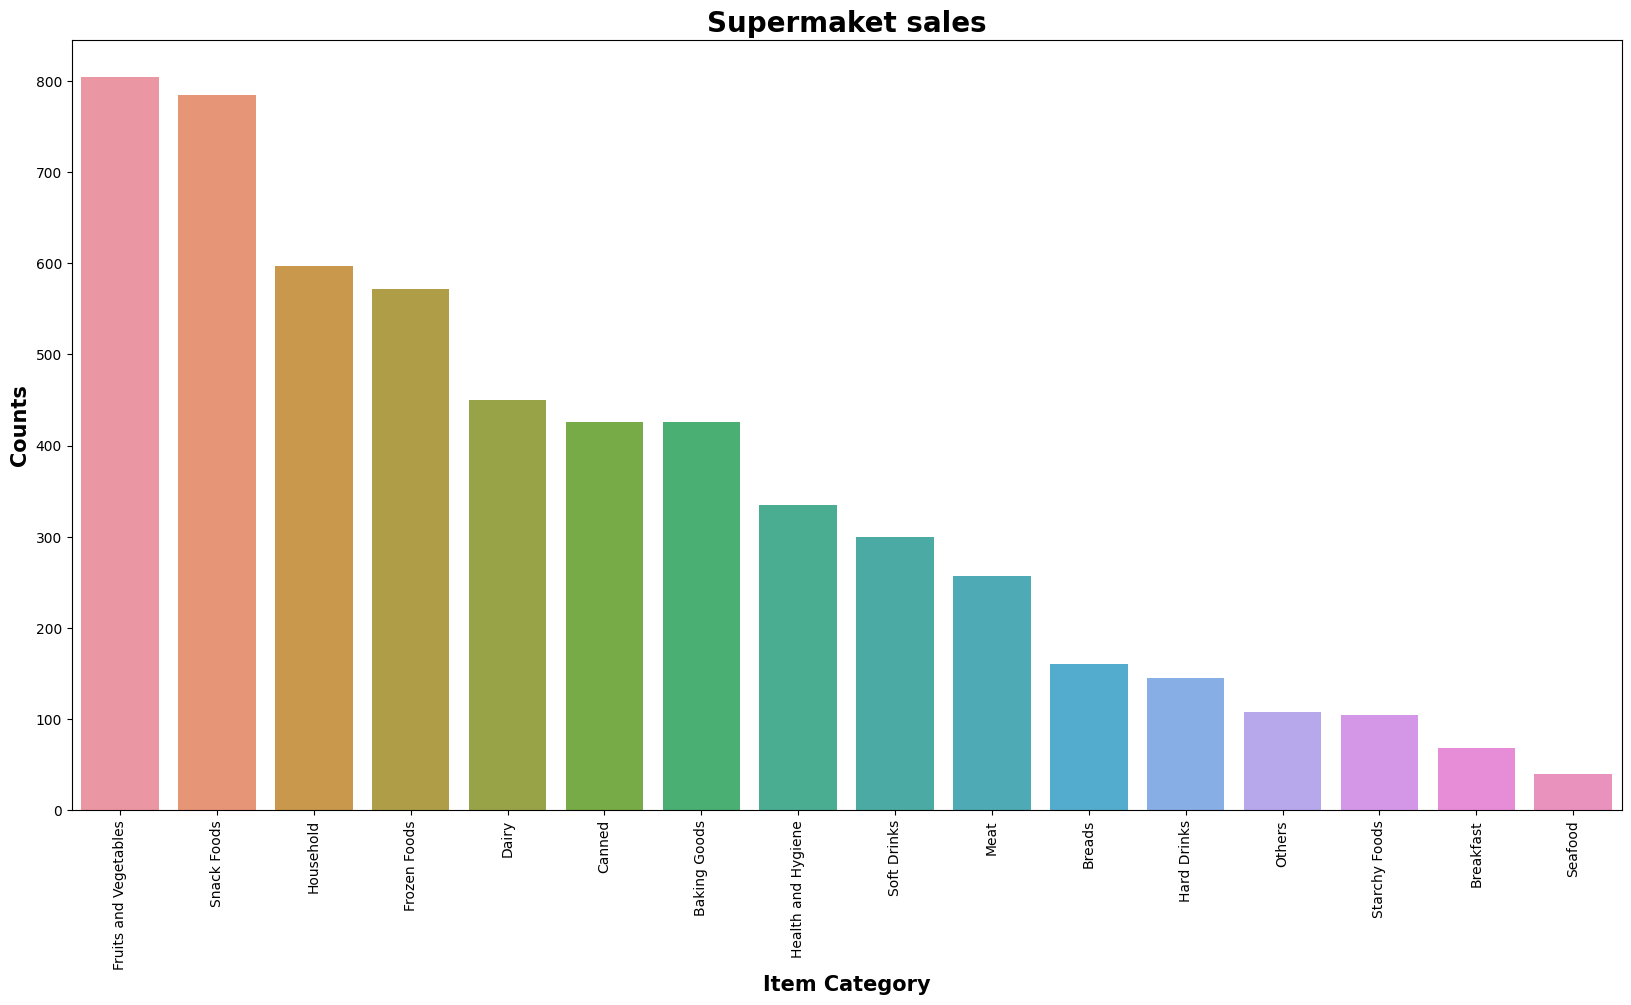

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=outlet_type,x = outlet_type.index, y = outlet_type['Item_Type'])
plt.xticks(rotation = 90)
ax.set_title('Supermaket sales', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Category', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold');

This graph shows that Supermarkets have the highest sales in fruit and vegetables and the lowest sales in Seafood. 

#**Preprocesing for Machine Learning**

##**Task:**

Will make predictions about future sales based on the data provided.

##**Import Libraries**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

# Filter ALL Warnings
import warnings
warnings.filterwarnings('ignore')

# **Reload the Data**

In [ ]:
#Load the data
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Stack 2 Intro to Machine Learning/Week 1/datasets/sales_predictions_2023_Part 5 core assignment_github.csv')

In [ ]:
#Display the first five rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##**Performing Preprocessing Steps**

In [ ]:
# Make a copy of original to avoid manipulation
original = df.copy()

##**Check for Duplicated, Missing, or Erroneous Data**

In [ ]:
# Check to see if there are any duplicate rows
original.duplicated().sum()

0

No duplicates found.

##**Handle Missing Values**

In [ ]:
# Display the sum of missing values
original.isna().sum().sum()

3873

In [ ]:
# Display the sum of missing values
original.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Display the percentage of missing values by column
print(original.isna().sum()/len(original)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


'Item_Weight' Column

- Missing 17.17% values
 - **Strategy:** 
  - replace missing values with the median value of the column
- **Justification**
    - This is less affected by outliers than strategy = 'mean'

In [ ]:
# Replace the median value of the column
median_age = original['Item_Weight'].median()

In [ ]:
# Replace the missing values with the column's 'median' value
original['Item_Weight'].fillna(value = median_age, inplace = True)

'Outlet_Size' Column

- Missing 28.28% values
- **Strategy:**
  - replace missing values with the value "Unknown"
- **Justification**
  - This typically will not create bias in favor of a specific label or class.

In [ ]:
# Replace missing values with "Unknown"
original.Outlet_Size.fillna(value = 'Unknown', inplace=True)

In [ ]:
#Drop 'Item_Identifier' and 'Item_Fat_Content column
original.drop(columns = ['Item_Identifier', 'Item_Fat_Content'], inplace = True)

In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


There are no more missing values.

In [ ]:
# Display descriptive statistics for all columns
original.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# Display descriptive statistics for all columns
original.describe(include='object')

,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523
unique,16,10,4,3,4
top,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,1232,935,2793,3350,5577


In [ ]:
# Display the column names, count of non-null values, and their datatypes
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [ ]:
# Inspect column names for Errors
original.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

No errors noted.

In [ ]:
# Check for common syntax errors, typos, inconsistencies in strings that need to be fixed
# Create a series of the datatypes
data_types = original.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == 'object')]
# Display the series of object datatypes
object_data_types

Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [ ]:
# Loop through the index of object_data_types
for column in object_data_types.index:
  print(column)
  print(original[column].unique())
  print('\n')

Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

In [ ]:
df['Outlet_Establishment_Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Outlet_Establishment_Year
Non-Null Count  Dtype 
--------------  ----- 
8523 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


##**Ordinal Encoding**

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

##**Split the Data (Validation Split)**

- Target: 'Item_Outlet_Sales'
- Features: the rest of the relevant variables

In [ ]:
# Split X and y, you are predicting price
X = original.drop(columns=['Item_Outlet_Sales']).copy()
y = original['Item_Outlet_Sales'].copy()

# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Display the first 5 values of the dataset
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,0.016645,Frozen Foods,120.9098,OUT045,2002,Unknown,Tier 2,Supermarket Type1


In [ ]:
# Display the first (5) values of the dataset
y_train.head()

4776     515.3292
7510    3056.0220
5828    1577.9460
5327    1331.6000
4810    1687.1372
Name: Item_Outlet_Sales, dtype: float64

##**Preprocessing Object**

In [ ]:
# Instantiate the transformers
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
df['Outlet_Size'].dtype

dtype('O')

##**Instantiate Transformers**

In [ ]:
#Transformers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
#Scaler
scaler = StandardScaler()
#OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

##**Instantiate Pipeline**

In [ ]:
num_pipeline = make_pipeline(median_imputer, scaler)
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
cat_pipeline = make_pipeline(freq_imputer, ohe)
cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

##**Instantiate ColumnTransformer**

In [ ]:
num_tuple = (num_pipeline, num_selector)
cat_tuple = (cat_pipeline, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9a51738b50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9a51707790>)])

##**Transform Data**

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9a51738b50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9a51707790>)])

In [ ]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

##View Result

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 41)




array([[ 0.82944552, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5686337 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11896108,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12582258, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77785212, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82944552, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
X_test_processed.shape

(2131, 41)

In [ ]:
print(X_train_processed)
print(X_train_processed.shape)

[[ 0.82944552 -0.71277507  1.82810922 ...  0.          1.
   0.        ]
 [ 0.5686337  -1.29105225  0.60336888 ...  0.          1.
   0.        ]
 [-0.11896108  1.81331864  0.24454056 ...  1.          0.
   0.        ]
 ...
 [ 1.12582258 -0.92052713  1.52302674 ...  1.          0.
   0.        ]
 [ 1.77785212 -0.2277552  -0.38377708 ...  1.          0.
   0.        ]
 [ 0.82944552 -0.95867683 -0.73836105 ...  1.          0.
   0.        ]]
(6392, 41)


In [ ]:
print(X_test_processed)
print(X_test_processed.shape)

[[ 0.34338714 -0.77664625 -0.99881554 ...  1.          0.
   0.        ]
 [-1.16695037  0.1003166  -1.58519423 ...  1.          0.
   0.        ]
 [ 0.39080747 -0.48299432 -1.59578435 ...  1.          0.
   0.        ]
 ...
 [-1.12664309  1.21832428  1.09397975 ...  1.          0.
   0.        ]
 [-1.48466658 -0.77809567 -0.36679966 ...  1.          0.
   0.        ]
 [ 0.53306846 -0.77976293  0.11221189 ...  1.          0.
   0.        ]]
(2131, 41)


#**Machine Learning Using a Regression Model**

#**Task**

- Help the retailer understand the properties of products and outlets hat play a crucial role in predicting sales. 

#**Import Libraries**

In [298]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatPlotLib
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Models
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Regression Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

from IPython.core.display import clear_output

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

#**Functions**

In [299]:
# Create a function to take the true and predicted values
# and print MAE, MSE, RMSE, and R2 metrics
def model_metrics(pipe, X_train, y_train, X_test, y_test, 
                       model_name='Regression Model'):
  
  """Takes a regression model, training features and target and testing features and target.
  Returns a dataframe of regression metrics"""

  # Predictions
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)
  
  metrics = ['train_MAE','test_MAE', 
             'train_RMSE', 'test_RMSE', 
             'train_R2', 'test_R2']
  
  # Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  # Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),4)

  # Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[f'{model_name}'])
  scores.loc[f'{model_name}', :] = [train_mae, test_mae,
                                          train_rmse, test_rmse,
                                          train_r2, test_r2]

  return scores

#**Load and Inspect the Data**

##**Load the Data**

In [300]:
# Load Data
path = '/content/drive/MyDrive/Coding Dojo/Stack 1 Intro do Python/Wk 2: Pandas for Data Manipulation/Datafiles/sales_predictions.csv'
df = pd.read_csv(path)

In [301]:
# Display the first (5) rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- The data appears to have loaded correctly.

In [302]:
## Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 8523 rows, and 12 columns.
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable.


In [303]:
## Display the column names and datatypes for each column
## Columns with mixed datatypes are identified as an object datatype
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [304]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [305]:
## Display the descriptive statistics for the numeric columns
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [306]:
## Display the descriptive statistics for the numeric columns
df.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


#**Clean the Data**

##**Remove Unnecessary Columns**

- Dropping "Item_Identifier" column due to high cardinality, (1559 is a high number of unique labels or classes). High cardinality will create a very sparse dataset when it is One Hot Encoded, which can negatively impact the models' medtics, and greatly increase processing times. 

In [307]:
# Drop a single column
df.drop(columns = 'Item_Identifier', inplace = True)

In [308]:
# Display the first (5) rows of the dataframe
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Confirmed, the column has been dropped.

## **Remove Unnecessary Rows**

###**Duplicates**

In [309]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


##**Inspect Column Datatypes for Errors**

In [310]:
# Display column names and datatypes
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

##**Inspect Column Names for Errors**

- Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.
- Check for typos or inconsistencies in strings that need to be fixed.

In [311]:
# Display column names
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

- No errors noted.

**Object Inconsistencies**

In [312]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [313]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [314]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

##**Inspect Values for Errors**

##**Missing Values**

In [315]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 3873 missing values.


In [316]:
# Display the count of missing values by column
print(df.isna().sum())

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [317]:
# Display the percentage of missing vlaues by column
print(df.isna().sum()/len(df)*100)

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


- **The missing values will need to be imputed:**
  - We will need to use the median for "Item_Weight" to account for outliers
  - We will need to use most_frequent for "Outlet_Type".

###**Number Columns**

- Check for unusual or impossible values. (Example a weight, or height that is negative in value.)

In [318]:
# Display the descriptive statistics for all columns
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [319]:
# Display the descriptive statistics for all columns
df.describe(include='object')

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,2,16,10,9,3,3,4
top,Low Fat,Fruits and Vegetables,OUT027,1985,Medium,Tier 3,Supermarket Type1
freq,5517,1232,935,1463,2793,3350,5577


#**Split the Data**

In [320]:
# Define features (X) and target (y)
target = 'Item_Outlet_Sales'
X = df.drop(columns = [target]).copy()
y = df[target].copy()

In [321]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#**Prepare the Data**

##**Column Selector**

In [322]:
#Instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

##**Transformers**

In [323]:
#Instantiate the transformers
#Imputers
median_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')
#Scaler
scaler = StandardScaler()
#OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

##**Pipeline**

In [324]:
#Pipeline
num_pipeline = make_pipeline(median_imputer, scaler)
cat_pipeline = make_pipeline(freq_imputer, ohe)


##**Tuples**

In [325]:
# Create tuples
number_tuple = (num_pipeline, num_selector)
cat_tuple = (cat_pipeline, cat_selector)

##**Column Transformer**

In [326]:
# Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(number_tuple, cat_tuple,
                                       remainder='drop')

##**Check that the preprocessing is working**

In [327]:
#fit on train
preprocessor.fit(X_train)

#transform train and test
X_train_processed = pd.DataFrame(preprocessor.transform(X_train),
                                 columns=preprocessor.get_feature_names_out())
X_test_processed = pd.DataFrame(preprocessor.transform(X_test),
                                columns=preprocessor.get_feature_names_out())
#Check for missing values and that data is scaled and one-hot encoded
display(X_train_processed.head(2))
X_train_processed.info()

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-2__Item_Fat_Content_Low Fat,pipeline-2__Item_Fat_Content_Regular,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,pipeline-2__Item_Type_Canned,pipeline-2__Item_Type_Dairy,...,pipeline-2__Outlet_Size_High,pipeline-2__Outlet_Size_Medium,pipeline-2__Outlet_Size_Small,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3
0,0.827485,-0.712775,1.828109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.566644,-1.291052,0.603369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   pipeline-1__Item_Weight                      6392 non-null   float64
 1   pipeline-1__Item_Visibility                  6392 non-null   float64
 2   pipeline-1__Item_MRP                         6392 non-null   float64
 3   pipeline-2__Item_Fat_Content_Low Fat         6392 non-null   float64
 4   pipeline-2__Item_Fat_Content_Regular         6392 non-null   float64
 5   pipeline-2__Item_Type_Baking Goods           6392 non-null   float64
 6   pipeline-2__Item_Type_Breads                 6392 non-null   float64
 7   pipeline-2__Item_Type_Breakfast              6392 non-null   float64
 8   pipeline-2__Item_Type_Canned                 6392 non-null   float64
 9   pipeline-2__Item_Type_Dairy                  6392 non-null   float64
 10  

#**Model the Data**

##**Functions**

In [328]:
## Display model performance metrics using a function
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics for a model
def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

##**Baseline Model**

- Instantiate the baseline model using the 'mean' startegy.
- Create a model pipeline using the preprocessor and model.
- Fit the model pipeline with the X_train dataset.

In [329]:
# Create an instance of the model
dummy = DummyRegressor(strategy='mean')

# Create a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)

# Fit the model
dummy_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f32c431ea70>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f32c431ead0>)])),
                ('dummyregressor', DummyRegressor())])

##**Metrics**

In [330]:
## Display model performance metrics using a function
train_preds = dummy_pipe.predict(X_train_processed)
test_preds = dummy_pipe.predict(X_test_processed)

eval_regression(y_train, train_preds, name='Baseline Regression Train')
eval_regression(y_test, test_preds, name='Baseline Regression Test')

Baseline Regression Train Scores
MAE: 1,360.2184 
MSE: 2,959,455.7045 
RMSE: 1,720.3069 
R2: 0.0000

Baseline Regression Test Scores
MAE: 1,326.1210 
MSE: 2,772,144.4627 
RMSE: 1,664.9758 
R2: -0.0048



#**Linear Regression Model**

- Instantiate the model.
- Create a model pipeline using the preprocessor and model.
- Fit the model pipeline on the X_train dataset.

In [331]:
# Create an instance of the model
lin_reg = LinearRegression()

# Create a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

#Fit the model
lin_reg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f32c431ea70>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f32c431ead0>)])),
                ('linearregression', LinearRegression())])

###**Metrics**

In [364]:
## Display model performance metrics using a function

train_preds = lin_reg_pipe.predict(X_train_processed)
test_preds = lin_reg_pipe.predict(X_test_processed)

lin_train_eval = eval_regression(y_train, train_preds, name='Linear Regression Train')
lin_test_eval = eval_regression(y_test, test_preds, name='Linear Regression Test')

Linear Regression Train Scores
MAE: 846.8925 
MSE: 1,297,577.9609 
RMSE: 1,139.1128 
R2: 0.5615

Linear Regression Test Scores
MAE: 803.9572 
MSE: 1,194,317.0807 
RMSE: 1,092.8482 
R2: 0.5671



#**Decision Tree Model**

##**Baseline Model**

##**Decision Tree Metrics**

In [365]:
#Make an instance of the Model
dec_tree = DecisionTreeRegressor(random_state = 42)

In [366]:
#Fit the model using the training data
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [367]:
# Predict the target values for the training set and the test set
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

##**Evaluate the Model**

In [368]:
#Evaluate the model
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.12909682111027831


##**Tune the Model**

In [369]:
#What was the depth of our default tree?
dec_tree.get_depth()

44

In [370]:
depths = range(2,45)
scores = pd.DataFrame(index=depths, columns=['Train', 'Test'])

for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree.fit(X_train_processed, y_train)
  scores.loc[depth, 'Train'] = dec_tree.score(X_train_processed, y_train)
  scores.loc[depth, 'Test'] = dec_tree.score(X_test_processed, y_test)

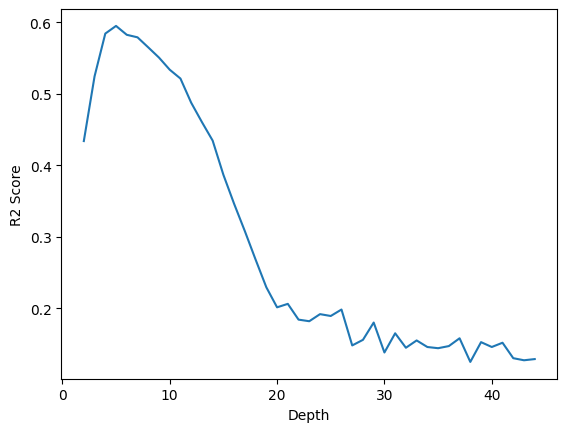

In [371]:
import matplotlib.pyplot as plt

plt.plot(depths, scores['Test'])
plt.xlabel('Depth')
plt.ylabel('R2 Score');

In [372]:
scores.sort_values(by='Test', ascending=False).head()

,Train,Test
5,0.603933,0.594709
4,0.582625,0.584005
6,0.615153,0.582307
7,0.626841,0.578772
8,0.643849,0.564725


In [373]:
## sort the dataframe by test scores and save the index (k) of the best score
best_depth = sorted_scores.index[0]
best_depth

5

**Best decision tree**
 - max_depth=5


In [374]:
# instantiate best DecisionTreeRegressor
best_dec_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
# fit
best_dec_tree.fit(X_train_processed, y_train)
# r2 scores
best_tree_train_score = best_dec_tree.score(X_train_processed, y_train)
best_tree_test_score = best_dec_tree.score(X_test_processed, y_test)

print(f'Best Training Decision Tree Score: {best_tree_train_score}')
print(f'Best Testing Decision Tree Score: {best_tree_test_score}')

Best Training Decision Tree Score: 0.603933236086491
Best Testing Decision Tree Score: 0.5947092601209935


##**Metrics**

In [375]:
dec_train_predict = best_dec_tree.predict(X_train_processed)
dec_test_predict = best_dec_tree.predict(X_test_processed)

In [376]:
dec_train_eval = eval_regression(y_train, dec_train_predict, name='Decision Tree Train')
print(dec_train_eval)

dec_test_eval = eval_regression(y_test, dec_test_predict, name='Decision Tree Test')
print(dec_test_eval)

Decision Tree Train Scores
MAE: 762.6399 
MSE: 1,172,142.0438 
RMSE: 1,082.6551 
R2: 0.6039

None
Decision Tree Test Scores
MAE: 738.3556 
MSE: 1,118,187.9463 
RMSE: 1,057.4441 
R2: 0.5947

None


#**Recommendation:**

Which model would you recommend to a stakeholder? Why?

- The Tuned Decision Tree model had the lowest RMSE, which is likely to be the most important metric for this problem. However MAE is easier to understand, and it also had the lowest MAE, so that might be good for reporting.

# Revisited: Importances and Coefficients

## Load Libraries

In [3]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance

## saving variables
import joblib

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)

## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

## Load Data

In [4]:
df = pd.read_csv("Data/sales_predictions_2023.csv")
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


## Clean the Data

In [5]:
# check for object inconsistencies
object_type = df.dtypes[df.dtypes == 'object']
for i in object_type.index:
  print(i, '---')
  print(df[i].unique())
  print("")

Item_Identifier ---
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Fat_Content ---
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Item_Type ---
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier ---
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Size ---
['Medium' nan 'High' 'Small']

Outlet_Location_Type ---
['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type ---
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [6]:
# fix inconsistencies
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

## Define X and y

In [8]:
## Define X and y
target = 'Item_Outlet_Sales'
X = df.drop(columns=target).copy()
y = df[target].copy()
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [9]:
## Drop unwanted/inappropriate columns 
bad_cols = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']
X = X.drop(columns=bad_cols)
## Perform a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## Making a Preprocessing Pipeline

In [10]:
## Create categorical pipeline
cat_selector = make_column_selector(dtype_include='object')
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
## Create numeric pipelien
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [14]:
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False,
                                      drop='if_binary'))

num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

In [15]:
preprocessor = make_column_transformer((cat_pipe, cat_selector),
                                       (num_pipe, num_selector),)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000246C2877D90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000246C2865EB0>)])

## Get Features Names + Verbose Feature Names Out

In [16]:
## make the preprocessing column transformer WITH CORRECT ARGS!
preprocessor = make_column_transformer((num_pipe, num_selector),
                                       (cat_pipe,cat_selector),
                                      verbose_feature_names_out=False)
preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,16.350,0.029565,256.4646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,15.250,0.000000,179.7660,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,12.350,0.158716,157.2946,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,7.975,0.014628,82.3250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,19.350,0.016645,120.9098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9.395,0.286345,139.1838,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5191,15.600,0.117575,75.6670,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5390,17.600,0.018944,237.3590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,20.350,0.054363,117.9466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [17]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_MISSING', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

## Scaled version to see how coefficients are different

In [18]:
scaling_preprocessor = make_pipeline(preprocessor, StandardScaler())
scaling_preprocessor.fit(X_train)
X_train_scaled_df = pd.DataFrame(scaling_preprocessor.transform(X_train),
                          columns=scaling_preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_scaled_df = pd.DataFrame(scaling_preprocessor.transform(X_test),
                          columns=scaling_preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_scaled_df)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,-0.740321,-0.284298,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,-0.417297,-0.164795,-0.254908,2.863062,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,-0.347583,-0.628994,1.428099,-0.623184,-0.615205,-0.700976,1.235105,-0.377964,-1.368035,2.842454,-0.357121
7510,0.556340,-1.291052,0.603369,1.350766,-0.284298,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,-0.417297,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,2.460729,-0.233691,-0.139491,-0.347583,-0.628994,1.428099,-0.623184,-0.615205,-0.700976,1.235105,-0.377964,-1.368035,2.842454,-0.357121
5828,-0.131512,1.813319,0.244541,1.350766,-0.284298,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,-0.417297,-0.164795,-0.254908,-0.349276,4.490608,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,-0.347583,-0.628994,1.428099,-0.623184,1.625474,-0.700976,-0.809648,-0.377964,0.730976,-0.351809,-0.357121
5327,-1.169219,-1.004931,-0.952591,-0.740321,3.517440,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,-0.417297,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,-0.347583,-0.628994,-0.700231,1.604663,-0.615205,1.426583,-0.809648,-0.377964,0.730976,-0.351809,-0.357121
4810,1.528819,-0.965484,-0.336460,-0.740321,-0.284298,-0.167776,-0.115397,-0.285261,-0.293515,3.018928,-0.417297,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,-0.347583,1.589841,-0.700231,-0.623184,-0.615205,1.426583,-0.809648,-0.377964,0.730976,-0.351809,-0.357121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.832409,4.309657,-0.044657,1.350766,-0.284298,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,2.396376,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,-0.347583,1.589841,-0.700231,-0.623184,-0.615205,-0.700976,1.235105,2.645751,-1.368035,-0.351809,-0.357121
5191,0.639356,1.008625,-1.058907,-0.740321,-0.284298,-0.167776,-0.115397,-0.285261,-0.293515,3.018928,-0.417297,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,-0.347583,1.589841,-0.700231,-0.623184,-0.615205,1.426583,-0.809648,-0.377964,0.730976,-0.351809,-0.357121
5390,1.113736,-0.920527,1.523027,-0.740321,-0.284298,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,-0.417297,-0.164795,3.922976,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,-0.347583,1.589841,-0.700231,-0.623184,-0.615205,1.426583,-0.809648,-0.377964,0.730976,-0.351809,-0.357121
860,1.766009,-0.227755,-0.383777,-0.740321,-0.284298,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,-0.417297,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,2.460729,-0.233691,-0.139491,-0.347583,1.589841,-0.700231,-0.623184,-0.615205,1.426583,-0.809648,-0.377964,0.730976,-0.351809,-0.357121


# Modeling

## Model 1 - Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [20]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

In [21]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.56,847.10,"1,139.58"
Test,0.57,805.66,"1,094.27"


## Extract Coefficients

In [22]:
# access the .coef_ 
coefs = lin_reg.coef_
coefs

array([-1.86061991e+00, -4.25369802e+02,  1.57163724e+01,  6.38330781e+01,
       -1.63590125e+01, -5.07768770e+01,  2.86347174e+01,  8.68902747e+00,
       -1.23641286e+02, -1.79124995e+01,  2.58434079e+01, -7.89714531e+00,
        1.03603584e+01, -1.25886377e+01, -2.84410088e+01, -4.56763187e+01,
        3.02601914e+02, -3.99522911e+01, -5.79364790e+01,  2.50521300e+01,
        3.92664483e-01, -1.18642156e+02,  1.14937056e+02,  3.31243566e+00,
       -7.93529018e+01,  6.77767153e+01,  1.15761865e+01, -1.60767755e+03,
        2.66230223e+02, -1.83277012e+02,  1.52472434e+03])

In [23]:
# Intercept
intercept = lin_reg.intercept_
intercept

-108.31665345288957

In [24]:
## Saving the coefficients
coefs = pd.Series(coefs, index=lin_reg.feature_names_in_)
coefs.sort_values(ascending=False)

Outlet_Type_Supermarket Type3      1524.724342
Item_Type_Seafood                   302.601914
Outlet_Type_Supermarket Type1       266.230223
Outlet_Size_Medium                  114.937056
Outlet_Location_Type_Tier 2          67.776715
Item_Fat_Content_Regular             63.833078
Item_Type_Breakfast                  28.634717
Item_Type_Fruits and Vegetables      25.843408
Item_Type_Starchy Foods              25.052130
Item_MRP                             15.716372
Outlet_Location_Type_Tier 3          11.576186
Item_Type_Health and Hygiene         10.360358
Item_Type_Canned                      8.689027
Outlet_Size_Small                     3.312436
Outlet_Size_High                      0.392664
Item_Weight                          -1.860620
Item_Type_Hard Drinks                -7.897145
Item_Type_Household                 -12.588638
Item_Type_Baking Goods              -16.359012
Item_Type_Frozen Foods              -17.912499
Item_Type_Meat                      -28.441009
Item_Type_Sna

In [34]:
## formatting numbers to not use , thousands sep, and 4 digits floats
pd.set_option('display.float_format', lambda x: f"{x:,.4f}")

In [35]:
# Define get_coefficients function to extract LinReg coefficients
def get_coefficients(lin_reg):
    coefs = lin_reg.coef_
    coefs = pd.Series(coefs, index=lin_reg.feature_names_in_)
    return coefs

In [30]:
## formatting numbers to not use , thousands sep, and 4 digits floats
pd.set_option('display.float_format', lambda x: f"{x:,.4f}")

# Scaled vs Unscaled Data

- Scaled: absolute value of coefficients show importance of features, or change in target due to change in one standard deviation of feature

- Unscaled: show impact of change of one unit for each feature on target.

## Shows what coeficients look like for Scaled data

In [36]:
# Fit a new model on a scaled version of the data
lin_reg_scaled = LinearRegression().fit(X_train_scaled_df, y_train)

# Examine new coefficients
get_coefficients(lin_reg_scaled).sort_values(ascending=False)

Outlet_Location_Type_Tier 3        1,664,733,434,026,022.0000
Outlet_Location_Type_Tier 2        1,599,941,101,315,092.5000
Outlet_Location_Type_Tier 1        1,519,168,115,602,102.0000
Item_Type_Fruits and Vegetables      421,362,683,712,845.4375
Item_Type_Snack Foods                413,508,884,397,926.7500
Item_Type_Household                  369,069,670,009,599.6250
Item_Type_Frozen Foods               353,885,383,480,544.2500
Item_Type_Dairy                      320,383,438,233,917.5000
Item_Type_Canned                     312,748,951,484,926.5000
Item_Type_Baking Goods               311,851,223,948,150.9375
Item_Type_Health and Hygiene         283,774,353,910,511.1875
Item_Type_Soft Drinks                262,711,439,069,420.5000
Item_Type_Meat                       251,538,787,009,236.3750
Item_Type_Breads                     193,464,953,152,471.6250
Item_Type_Hard Drinks                190,211,205,191,776.2812
Item_Type_Others                     167,348,202,641,138.0000
Item_Typ

## Let's try Unscaled data Coefficients

In [38]:
get_coefficients(lin_reg).sort_values(ascending=False)

Outlet_Type_Supermarket Type3      1,524.7243
Item_Type_Seafood                    302.6019
Outlet_Type_Supermarket Type1        266.2302
Outlet_Size_Medium                   114.9371
Outlet_Location_Type_Tier 2           67.7767
Item_Fat_Content_Regular              63.8331
Item_Type_Breakfast                   28.6347
Item_Type_Fruits and Vegetables       25.8434
Item_Type_Starchy Foods               25.0521
Item_MRP                              15.7164
Outlet_Location_Type_Tier 3           11.5762
Item_Type_Health and Hygiene          10.3604
Item_Type_Canned                       8.6890
Outlet_Size_Small                      3.3124
Outlet_Size_High                       0.3927
Item_Weight                           -1.8606
Item_Type_Hard Drinks                 -7.8971
Item_Type_Household                  -12.5886
Item_Type_Baking Goods               -16.3590
Item_Type_Frozen Foods               -17.9125
Item_Type_Meat                       -28.4410
Item_Type_Snack Foods             

## Interpreting Coefficients

- The top 3 most impactful features are:
    - Outlet_Type_Supermarket Type3
        - increasing this feature cause a 1,524.7243 change in the target
    - Item_Type_Seafood
        - increasing this feature cause a 302.6019 change in the target
    - Outlet_Type_Supermarket Type1
        - increasing this feature cause a 266.2302 change in the target

# Visualizing Coefficients

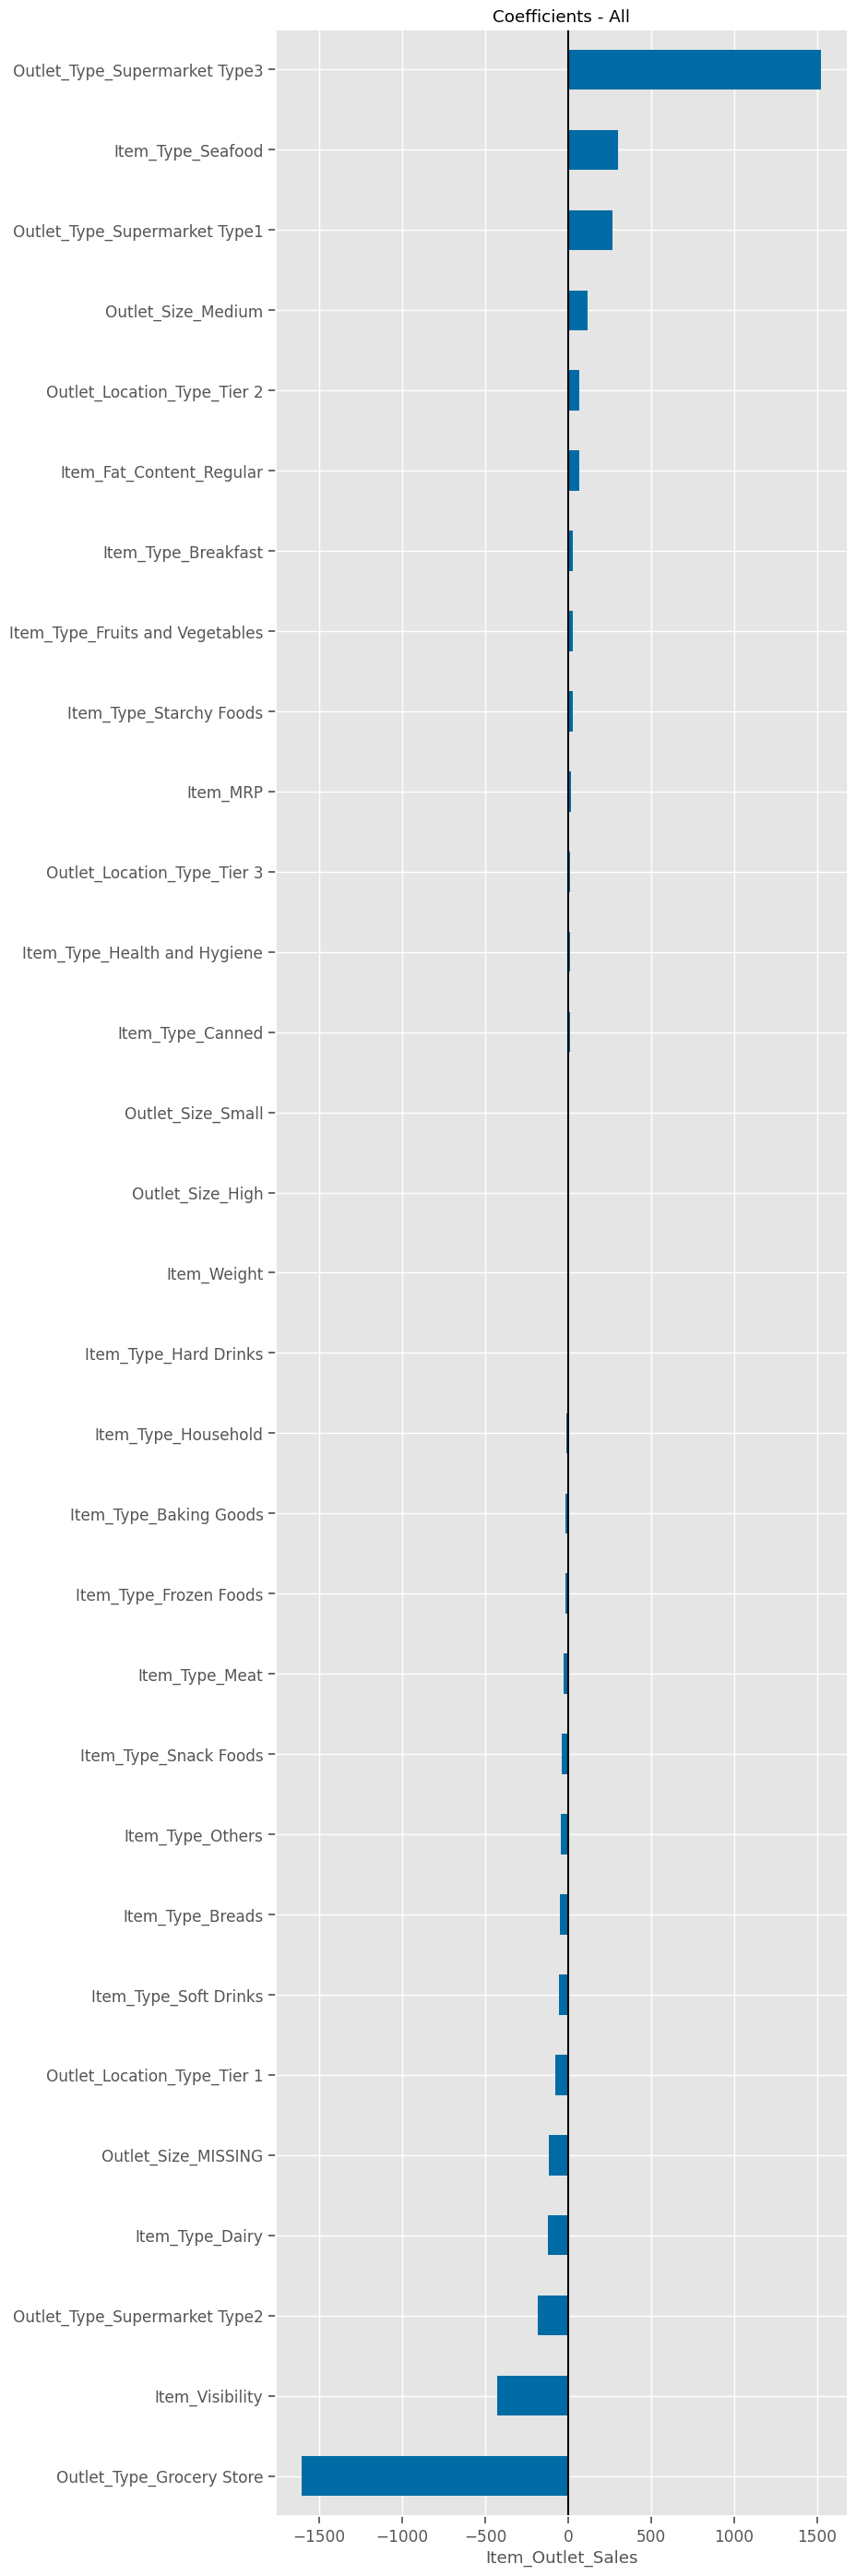

In [39]:
ax = coefs.sort_values().plot(kind='barh', figsize=(8,35))
ax.axvline(0, color='k')
ax.set(xlabel='Item_Outlet_Sales', title="Coefficients - All");

# Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_df,y_train)
evaluate_regression(rf_reg, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.94,300.26,431.32
Test,0.55,777.56,"1,120.10"


In [42]:
# Extract Feature Importances
importances = pd.Series(rf_reg.feature_importances_, index=rf_reg.feature_names_in_)
importances.sort_values()

Item_Type_Others                  0.0016
Item_Type_Seafood                 0.0018
Item_Type_Breads                  0.0025
Outlet_Type_Supermarket Type2     0.0027
Item_Type_Breakfast               0.0029
Item_Type_Hard Drinks             0.0029
Outlet_Type_Supermarket Type1     0.0032
Item_Type_Starchy Foods           0.0034
Item_Type_Meat                    0.0036
Item_Type_Health and Hygiene      0.0038
Item_Type_Baking Goods            0.0042
Outlet_Location_Type_Tier 3       0.0042
Item_Type_Canned                  0.0045
Outlet_Size_High                  0.0048
Outlet_Size_Medium                0.0052
Outlet_Size_MISSING               0.0057
Item_Type_Soft Drinks             0.0057
Outlet_Location_Type_Tier 2       0.0058
Item_Type_Frozen Foods            0.0060
Item_Type_Household               0.0062
Outlet_Location_Type_Tier 1       0.0062
Item_Type_Dairy                   0.0067
Outlet_Size_Small                 0.0078
Item_Type_Fruits and Vegetables   0.0078
Item_Type_Snack 

In [43]:
# create a function to extract importances
def get_importances(rf_reg):
    importances = pd.Series(rf_reg.feature_importances_, index=rf_reg.feature_names_in_)
    return importances
get_importances(rf_reg)

Item_Weight                       0.0527
Item_Visibility                   0.1049
Item_MRP                          0.4466
Item_Fat_Content_Regular          0.0091
Item_Type_Baking Goods            0.0042
Item_Type_Breads                  0.0025
Item_Type_Breakfast               0.0029
Item_Type_Canned                  0.0045
Item_Type_Dairy                   0.0067
Item_Type_Frozen Foods            0.0060
Item_Type_Fruits and Vegetables   0.0078
Item_Type_Hard Drinks             0.0029
Item_Type_Health and Hygiene      0.0038
Item_Type_Household               0.0062
Item_Type_Meat                    0.0036
Item_Type_Others                  0.0016
Item_Type_Seafood                 0.0018
Item_Type_Snack Foods             0.0082
Item_Type_Soft Drinks             0.0057
Item_Type_Starchy Foods           0.0034
Outlet_Size_High                  0.0048
Outlet_Size_MISSING               0.0057
Outlet_Size_Medium                0.0052
Outlet_Size_Small                 0.0078
Outlet_Location_

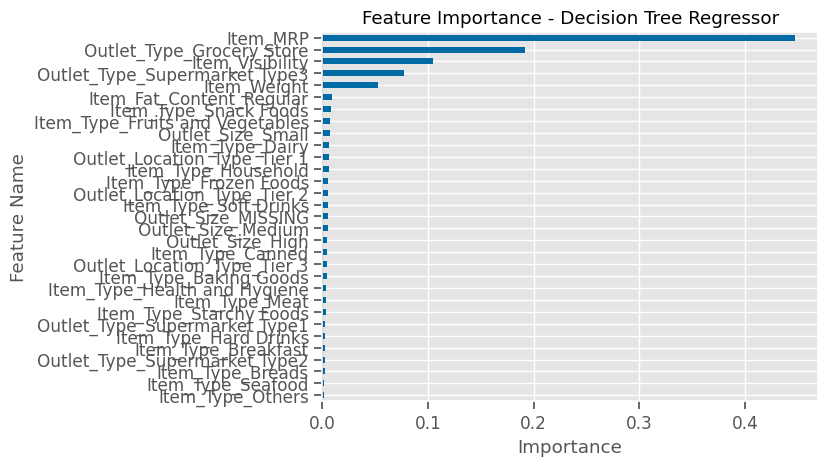

In [52]:
# Plot Importances
ax = importances.sort_values().plot(kind='barh')
ax.axvline(0, color='k')
ax.set(title='Feature Importance - Decision Tree Regressor',ylabel="Feature Name",
      xlabel='Importance');

The top 5 most important features are: 

    - Item_MRP
    - Outlet_Type_Grocery Store
    - Item_Visibility
    - Outlet_Type_Supermarket Type3
    - Item_Weight

# Serializing

In [54]:
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'X_train_df':X_train_df,
         'y_train_': y_train,
         'X_test_df':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
          'LinearRegression': lin_reg,
         'RandomForest':rf_reg}
joblib.dump(export, 'Data/best_models.joblib')

['Data/best_models.joblib']

In [55]:
loaded = joblib.load('Data/best_models.joblib')
loaded.keys()

dict_keys(['X_train_df', 'y_train_', 'X_test_df', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])